In [1]:
import os

path_brezposelni = "../structured_data"

os.listdir(path_brezposelni)

['.ipynb_checkpoints',
 'najvisja_zaposlenost_obcine_izobrazba.ipynb',
 'po-obcinah_izobrazba.csv',
 'po-obcinah_spol.csv',
 'po-obcinah_starost.csv',
 'po-obcinah_trajanje-brezposelnosti.csv',
 'po-statisticnah-regijah_izobrazba.csv',
 'po-statisticnah-regijah_spol.csv',
 'po-statisticnah-regijah_starost.csv',
 'po-statisticnah-regijah_trajanje-brezposelnosti.csv',
 'po-uradih-za-delo_izobrazba.csv',
 'po-uradih-za-delo_spol.csv',
 'po-uradih-za-delo_starost.csv',
 'po-uradih-za-delo_trajanje-brezposelnosti.csv',
 'stopnje_obcine.csv',
 'zaposleni',
 'zaposleni_po_obcinah.xlsx']

In [2]:
import pandas as pd

brezposelni = pd.read_csv(path_brezposelni + "/po-statisticnah-regijah_starost.csv")
brezposelni.head()

,Kohezijska / statistična regija,15 do 24 let,25 do 29 let,30 do 39 let,40 do 49 let,50 do 54 let,55 let ali več,Skupaj,month,year
0,Slovenija,7155.0,10017.0,19253.0,17040.0,11123.0,23331.0,87919.0,JAN,2018
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JAN,2018
2,Vzhodna Slovenija,4895.0,6094.0,11008.0,10017.0,6851.0,13307.0,52172.0,JAN,2018
3,Jugovzhodna Slovenija,712.0,742.0,1331.0,1109.0,737.0,1568.0,6199.0,JAN,2018
4,Koroška,248.0,331.0,574.0,522.0,371.0,609.0,2655.0,JAN,2018


In [3]:
# Najprej zamenja vse \r\n v \n (zato da dela na windows in linux)
brezposelni.rename(columns=lambda x: x.replace('\r\n', '\n'), inplace=True)

brezposelni.rename(columns = {"Kohezijska / statistična regija":"regija", "15 do 24 let":"15-24",
                              "25 do 29 let":"25-29", "30 do 39 let":"30-39", "40 do 49 let":"40-49",
                             "50 do 54 let":"50-54", "55 let ali več":"55+", "skupaj":"skupaj"}, inplace = True)

In [4]:
brezposelni

,regija,15-24,25-29,30-39,40-49,50-54,55+,Skupaj,month,year
0,Slovenija,7155.0,10017.0,19253.0,17040.0,11123.0,23331.0,87919.0,JAN,2018
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JAN,2018
2,Vzhodna Slovenija,4895.0,6094.0,11008.0,10017.0,6851.0,13307.0,52172.0,JAN,2018
3,Jugovzhodna Slovenija,712.0,742.0,1331.0,1109.0,737.0,1568.0,6199.0,JAN,2018
4,Koroška,248.0,331.0,574.0,522.0,371.0,609.0,2655.0,JAN,2018
...,...,...,...,...,...,...,...,...,...,...
945,Goriška,148.0,178.0,382.0,448.0,174.0,606.0,1936.0,FEB,2023
946,Obalno-kraška,212.0,266.0,642.0,765.0,303.0,802.0,2990.0,FEB,2023
947,Osrednjeslovenska,838.0,1253.0,2927.0,2983.0,1276.0,3633.0,12910.0,FEB,2023
948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEB,2023


In [5]:
brezposelni = brezposelni.dropna(subset=["regija"])
brezposelni.head()

,regija,15-24,25-29,30-39,40-49,50-54,55+,Skupaj,month,year
0,Slovenija,7155.0,10017.0,19253.0,17040.0,11123.0,23331.0,87919.0,JAN,2018
2,Vzhodna Slovenija,4895.0,6094.0,11008.0,10017.0,6851.0,13307.0,52172.0,JAN,2018
3,Jugovzhodna Slovenija,712.0,742.0,1331.0,1109.0,737.0,1568.0,6199.0,JAN,2018
4,Koroška,248.0,331.0,574.0,522.0,371.0,609.0,2655.0,JAN,2018
5,Podravska,1479.0,1881.0,3284.0,2983.0,1899.0,3664.0,15190.0,JAN,2018


In [6]:
path_zaposleni = "../structured_data/zaposleni"

os.listdir(path_zaposleni)

['old', 'zaposleni_po_obcinah.xlsx', 'zaposleni_po_regijah.xlsx']

In [7]:
zaposleni = pd.read_excel(path_zaposleni + "/zaposleni_po_regijah.xlsx", header=[0, 1])
zaposleni.head()

Unnamed: 0_level_0   15-24                                                  \
  Unnamed: 0_level_1 2010M01 2010M02 2010M03 2010M04 2010M05 2010M06 2010M07   
0           SLOVENIA   38654   38277   37915   37485   36886   36609   35836   
1           Pomurska    1915    1926    1930    1965    1962    1983    1973   
2          Podravska    5366    5332    5326    5244    5125    5076    5014   
3            Koroška    1390    1362    1342    1326    1303    1309    1277   
4          Savinjska    5059    4964    4884    4852    4824    4797    4671   

                   ...     60+                                          \
  2010M08 2010M09  ... 2022M05 2022M06 2022M07 2022M08 2022M09 2022M10   
0   35185   35592  ...   55673   56451   56830   57502   57618   58328   
1    1939    1891  ...    2970    3010    3022    3041    3069    3110   
2    4956    5003  ...    8603    8761    8893    8988    8971    9070   
3    1258    1263  ...    1807    1821    1854    1886    1892    1918   
4    4617    4703  ...    6225    6310    6344    6442    6434    6513   

                                   
  2022M11 2022M12 2023M01 2023M02  
0   58982   59845   57739   58017  
1    3145    3177    3035    3052  
2    9153    9396    8944    8997  
3    1943    1980    1892    1889  
4    6579    6661    6435    6472  

[5 rows x 1423 columns]

In [8]:
# Združi ('age', 'date') -> 'age__TEMP__date'
zaposleni.columns = ['__TEMP__'.join(col) for col in zaposleni.columns]
zaposleni.head()
len(zaposleni.columns[1:])

1422

In [9]:
regija = 'Unnamed: 0_level_0' + '__TEMP__'+ 'Unnamed: 0_level_1'

# This melts columns which are inside value_vars into rows,
# id_vars pa pusti kot identifiers. (lahko damo samo to vrednost)
# The melted columns are assigned to 'age + date' and 'value' using the var_name and value_name parameters, respectively.
# v var_name daš kako bo ime stolpcu, ki bo vseboval 'imena prejšnjih stolpcev'
# v value_name pa daš kako bo ime stolpcu, ki bo mel vrednosti
# Ta melted df nej bi mel 1422 krat več vrstic ((13 let * 12 mesecev + 2 meseca) * 9 age range)

melted_zaposleni = zaposleni.melt(
                    id_vars=zaposleni.columns[0],
                    #value_vars=zaposleni.columns[1:],
                    var_name='age + date',
                    value_name='value')

melted_zaposleni.rename(columns = {regija:"regija"}, inplace = True)

print('prej st. vrstic: ' + str(len(zaposleni)))
print('melted st. vrstic: ' + str(len(melted_zaposleni)))
print('1422 * prej = ' + str(len(zaposleni) * 1422))

melted_zaposleni.head()

prej st. vrstic: 13
melted st. vrstic: 18486
1422 * prej = 18486


,regija,age + date,value
0,SLOVENIA,15-24__TEMP__2010M01,38654
1,Pomurska,15-24__TEMP__2010M01,1915
2,Podravska,15-24__TEMP__2010M01,5366
3,Koroška,15-24__TEMP__2010M01,1390
4,Savinjska,15-24__TEMP__2010M01,5059


In [10]:
# Split the 'age + date' column into 2 separate columns
melted_zaposleni[['age', 'date']] = melted_zaposleni['age + date'].str.split('__TEMP__', expand=True)
melted_zaposleni = melted_zaposleni.drop('age + date', axis=1)
melted_zaposleni.head()

,regija,value,age,date
0,SLOVENIA,38654,15-24,2010M01
1,Pomurska,1915,15-24,2010M01
2,Podravska,5366,15-24,2010M01
3,Koroška,1390,15-24,2010M01
4,Savinjska,5059,15-24,2010M01


In [11]:
# Split the 'date' column into 2 separate columns
melted_zaposleni[["year", "month"]] = melted_zaposleni["date"].str.split("M", expand=True)
melted_zaposleni = melted_zaposleni.drop('date', axis=1)
melted_zaposleni.head()

,regija,value,age,year,month
0,SLOVENIA,38654,15-24,2010,01
1,Pomurska,1915,15-24,2010,01
2,Podravska,5366,15-24,2010,01
3,Koroška,1390,15-24,2010,01
4,Savinjska,5059,15-24,2010,01


In [12]:
melted_zaposleni["year"] = melted_zaposleni["year"].astype(int)
melted_zaposleni["month"] = melted_zaposleni["month"].astype(int)

# zbrisem vse pred 2018, ker nimamo podatkov o brezposelnih pred 2018
melted_zaposleni = melted_zaposleni[melted_zaposleni["year"] >= 2018]
melted_zaposleni.head()

,regija,value,age,year,month
1248,SLOVENIA,36452,15-24,2018,1
1249,Pomurska,1817,15-24,2018,1
1250,Podravska,5103,15-24,2018,1
1251,Koroška,1418,15-24,2018,1
1252,Savinjska,4985,15-24,2018,1


In [13]:
# Zdej bom kr probal se spremenit brezposelni df v obliko, ki je melted_zaposleni
brezposelni.head()

,regija,15-24,25-29,30-39,40-49,50-54,55+,Skupaj,month,year
0,Slovenija,7155.0,10017.0,19253.0,17040.0,11123.0,23331.0,87919.0,JAN,2018
2,Vzhodna Slovenija,4895.0,6094.0,11008.0,10017.0,6851.0,13307.0,52172.0,JAN,2018
3,Jugovzhodna Slovenija,712.0,742.0,1331.0,1109.0,737.0,1568.0,6199.0,JAN,2018
4,Koroška,248.0,331.0,574.0,522.0,371.0,609.0,2655.0,JAN,2018
5,Podravska,1479.0,1881.0,3284.0,2983.0,1899.0,3664.0,15190.0,JAN,2018


In [14]:
# This melts columns ['15-24', '25-29'...] into rows, (inside value_vars)
# while keeping the ['regija', 'month', 'year'] columns as identifiers.
# value_vars is optional (ker id_vars unija value_vars so vsi stolpci)
# The melted columns are assigned to 'age' and 'value' using the var_name and value_name parameters, respectively.
# v var_name daš kako bo ime stolpcu, ki bo vseboval 'age range'
# v value_name pa daš kako bo ime stolpcu, ki bo mel vrednosti
# Ta melted df nej bi mel 7 krat več vrstic

brezposelni_melted = brezposelni.melt(
    id_vars=['regija', 'month', 'year'],
    #value_vars=['15-24', '25-29', '30-39', '40-49', '50-54', '55+', 'skupaj'],
    var_name='age',
    value_name='value')

print('prej st. vrstic: ' + str(len(brezposelni)))
print('melted st. vrstic: ' + str(len(brezposelni_melted)))
print('7 * prej = ' + str(len(brezposelni) * 7))

brezposelni_melted.head()
brezposelni_melted

prej st. vrstic: 800
melted st. vrstic: 5600
7 * prej = 5600


,regija,month,year,age,value
0,Slovenija,JAN,2018,15-24,7155.0
1,Vzhodna Slovenija,JAN,2018,15-24,4895.0
2,Jugovzhodna Slovenija,JAN,2018,15-24,712.0
3,Koroška,JAN,2018,15-24,248.0
4,Podravska,JAN,2018,15-24,1479.0
...,...,...,...,...,...
5595,Gorenjska,FEB,2023,Skupaj,3340.0
5596,Goriška,FEB,2023,Skupaj,1936.0
5597,Obalno-kraška,FEB,2023,Skupaj,2990.0
5598,Osrednjeslovenska,FEB,2023,Skupaj,12910.0


In [15]:
# Map month names to numbers
month_mapping = {
    "JAN": 1,
    "FEB": 2,
    "MAR": 3,
    "APR": 4,
    "MAJ": 5,
    "JUN": 6,
    "JUL": 7,
    "AVG": 8,
    "SEP": 9,
    "OKT": 10,
    "NOV": 11,
    "DEC": 12,
}
brezposelni_melted["month"] = brezposelni_melted["month"].map(month_mapping)
brezposelni_melted.head()

,regija,month,year,age,value
0,Slovenija,1,2018,15-24,7155.0
1,Vzhodna Slovenija,1,2018,15-24,4895.0
2,Jugovzhodna Slovenija,1,2018,15-24,712.0
3,Koroška,1,2018,15-24,248.0
4,Podravska,1,2018,15-24,1479.0


In [16]:
# Change order of columns
new_order = ['regija', 'value', 'age', 'year', 'month']
brezposelni_melted = brezposelni_melted[new_order]
print(len(brezposelni_melted))
brezposelni_melted.head()

5600


,regija,value,age,year,month
0,Slovenija,7155.0,15-24,2018,1
1,Vzhodna Slovenija,4895.0,15-24,2018,1
2,Jugovzhodna Slovenija,712.0,15-24,2018,1
3,Koroška,248.0,15-24,2018,1
4,Podravska,1479.0,15-24,2018,1


In [17]:
# regija to UPPER
brezposelni_melted["regija"] = brezposelni_melted["regija"].str.upper()

In [18]:
# BREZPOSELNI
print(brezposelni_melted["age"].unique())
brezposelni_melted.head()

['15-24' '25-29' '30-39' '40-49' '50-54' '55+' 'Skupaj']


,regija,value,age,year,month
0,SLOVENIJA,7155.0,15-24,2018,1
1,VZHODNA SLOVENIJA,4895.0,15-24,2018,1
2,JUGOVZHODNA SLOVENIJA,712.0,15-24,2018,1
3,KOROŠKA,248.0,15-24,2018,1
4,PODRAVSKA,1479.0,15-24,2018,1


In [19]:
# ZAPOSLENI
melted_zaposleni = melted_zaposleni.reset_index(drop=True)

print(melted_zaposleni["age"].unique())
melted_zaposleni.head()

['15-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60+']


,regija,value,age,year,month
0,SLOVENIA,36452,15-24,2018,1
1,Pomurska,1817,15-24,2018,1
2,Podravska,5103,15-24,2018,1
3,Koroška,1418,15-24,2018,1
4,Savinjska,4985,15-24,2018,1


In [20]:
# Treba še da bo age range enak na obeh. Zaposleni ima vse, ki ima brezposelni in še več zato samo združim pri zaposlenih.

def map_age_range_for_zaposleni(age_range):
    if age_range == '30-34' or age_range == '35-39':
        return '30-39'
    elif age_range == '40-44' or age_range == '45-49':
        return '40-49'
    elif age_range == '55-59' or age_range == '60+':
        return '55+'
    else:
        return age_range
    
# Create a new column 'new_age' based on the column 'age'
melted_zaposleni['new_age'] = melted_zaposleni['age'].apply(lambda x: map_age_range_for_zaposleni(x))

# Remove old age
melted_zaposleni = melted_zaposleni.drop('age', axis=1)
melted_zaposleni.rename(columns={"new_age":"age"}, inplace = True)
melted_zaposleni.head()

,regija,value,year,month,age
0,SLOVENIA,36452,2018,1,15-24
1,Pomurska,1817,2018,1,15-24
2,Podravska,5103,2018,1,15-24
3,Koroška,1418,2018,1,15-24
4,Savinjska,4985,2018,1,15-24


In [21]:
# Define the aggregation function
aggregation = {'regija': 'first', 'value': 'sum', 'year': 'first', 'month': 'first'}

# Group the rows by 'age' and apply the aggregation function
zaposleni_ok = melted_zaposleni.groupby(['regija', 'year', 'month', 'age'], as_index=False)['value'].sum()

zaposleni_ok["regija"] = zaposleni_ok["regija"].str.upper()
print(zaposleni_ok["age"].unique())
zaposleni_ok.head()

['15-24' '25-29' '30-39' '40-49' '50-54' '55+']


,regija,year,month,age,value
0,GORENJSKA,2018,1,15-24,4077
1,GORENJSKA,2018,1,25-29,8866
2,GORENJSKA,2018,1,30-39,24638
3,GORENJSKA,2018,1,40-49,25797
4,GORENJSKA,2018,1,50-54,12630


In [22]:
brezposelni_ok = brezposelni_melted
print(brezposelni_ok["age"].unique())
brezposelni_ok.head()

['15-24' '25-29' '30-39' '40-49' '50-54' '55+' 'Skupaj']


,regija,value,age,year,month
0,SLOVENIJA,7155.0,15-24,2018,1
1,VZHODNA SLOVENIJA,4895.0,15-24,2018,1
2,JUGOVZHODNA SLOVENIJA,712.0,15-24,2018,1
3,KOROŠKA,248.0,15-24,2018,1
4,PODRAVSKA,1479.0,15-24,2018,1


In [23]:
brezposelni_ok.rename(columns={"value":"brezposelni"}, inplace=True)
zaposleni_ok.rename(columns={"value":"zaposleni"}, inplace=True)

merged = brezposelni_ok.merge(zaposleni_ok, on=['regija', 'age', 'year', 'month'])
merged.head()

,regija,brezposelni,age,year,month,zaposleni
0,JUGOVZHODNA SLOVENIJA,712.0,15-24,2018,1,3348
1,KOROŠKA,248.0,15-24,2018,1,1418
2,PODRAVSKA,1479.0,15-24,2018,1,5103
3,POMURSKA,757.0,15-24,2018,1,1817
4,POSAVSKA,333.0,15-24,2018,1,1491


In [90]:
def calc_percentage(row):
    vsi = row['brezposelni'] + row['zaposleni']
    return row['brezposelni'] / vsi * 100

merged['procent_brezposelnosti'] = merged.apply(calc_percentage, axis=1)
max_perc = merged['procent_brezposelnosti'].max()

print("min: " + str(merged['procent_brezposelnosti'].min()))
print("max: " + str(merged['procent_brezposelnosti'].max()))
print()
print("regije: " + str(merged['regija'].unique()))

merged

min: 2.0045558086560367
max: 31.30755064456722

regije: ['JUGOVZHODNA SLOVENIJA' 'KOROŠKA' 'PODRAVSKA' 'POMURSKA' 'POSAVSKA'
 'PRIMORSKO-NOTRANJSKA' 'SAVINJSKA' 'ZASAVSKA' 'GORENJSKA' 'GORIŠKA'
 'OBALNO-KRAŠKA' 'OSREDNJESLOVENSKA']


,regija,brezposelni,age,year,month,zaposleni,procent_brezposelnosti
0,JUGOVZHODNA SLOVENIJA,712.0,15-24,2018,1,3348,17.536946
1,KOROŠKA,248.0,15-24,2018,1,1418,14.885954
2,PODRAVSKA,1479.0,15-24,2018,1,5103,22.470374
3,POMURSKA,757.0,15-24,2018,1,1817,29.409479
4,POSAVSKA,333.0,15-24,2018,1,1491,18.256579
...,...,...,...,...,...,...,...
3595,ZASAVSKA,404.0,55+,2023,2,4484,8.265139
3596,GORENJSKA,988.0,55+,2023,2,16264,5.726872
3597,GORIŠKA,606.0,55+,2023,2,9840,5.801264
3598,OBALNO-KRAŠKA,802.0,55+,2023,2,10395,7.162633


In [91]:
regije = {}
for year in merged["year"].unique():
    regije[year] = {}
    
    for month in merged["month"].unique():
        regije[year][month] = {}
        
        for age_range in ['15-24', '25-29', '30-39', '40-49', '50-54', '55+']:
            regije[year][month][age_range] = merged.loc[
                                    (merged['year'] == year) &\
                                    (merged['month'] == month) &\
                                    (merged['age'] == age_range)]
        
regije[2018][1]['15-24']

,regija,brezposelni,age,year,month,zaposleni,procent_brezposelnosti
0,JUGOVZHODNA SLOVENIJA,712.0,15-24,2018,1,3348,17.536946
1,KOROŠKA,248.0,15-24,2018,1,1418,14.885954
2,PODRAVSKA,1479.0,15-24,2018,1,5103,22.470374
3,POMURSKA,757.0,15-24,2018,1,1817,29.409479
4,POSAVSKA,333.0,15-24,2018,1,1491,18.256579
5,PRIMORSKO-NOTRANJSKA,134.0,15-24,2018,1,1029,11.521926
6,SAVINJSKA,995.0,15-24,2018,1,4985,16.638796
7,ZASAVSKA,237.0,15-24,2018,1,1061,18.258860
8,GORENJSKA,435.0,15-24,2018,1,4077,9.640957
9,GORIŠKA,239.0,15-24,2018,1,1886,11.247059


In [92]:
import json
    
with open("../colored_map/slovenija_regije.json", "r", encoding="utf-8") as json_file:
    data = json.load(json_file)

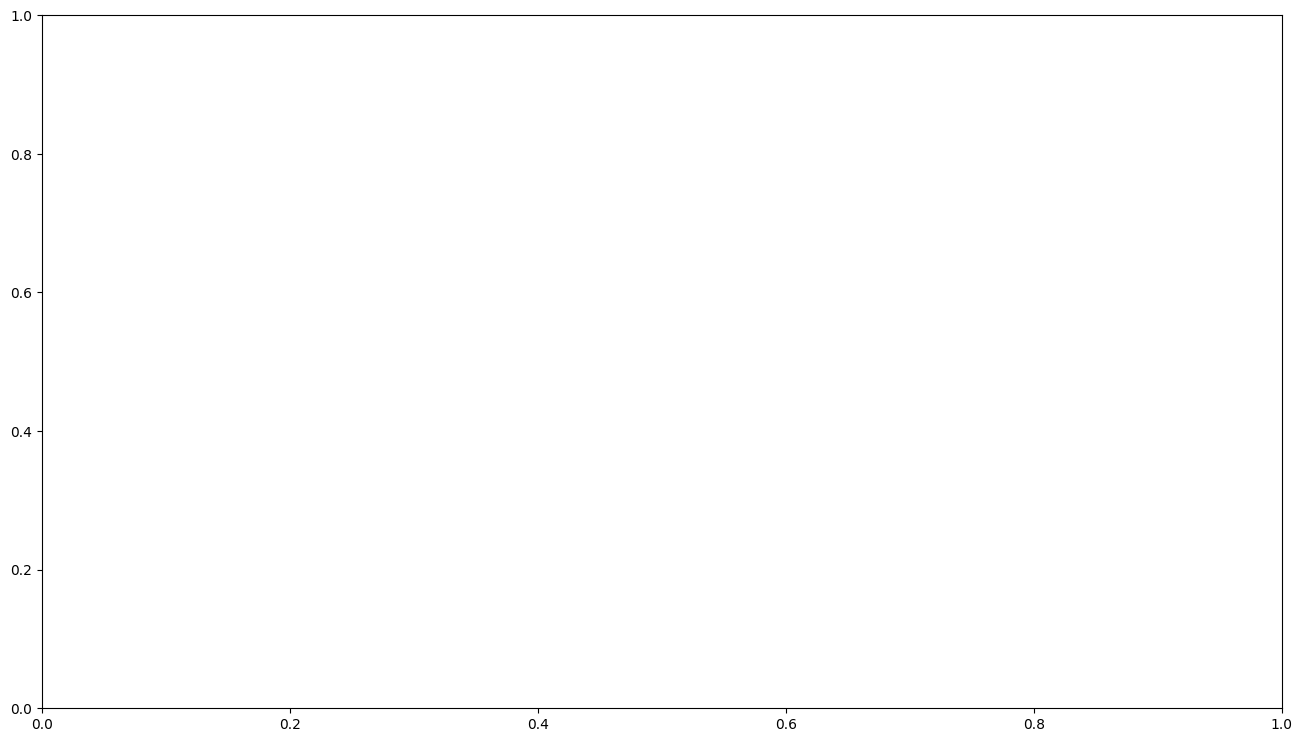

In [103]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import random

fig, ax = plt.subplots(figsize=(16, 9))


""""for age_group in ['15-24', '25-29', '30-39', '40-49', '50-54', '55+']:
    
    for year in [2018, 2019, 2021, 2022, 2023]:

        for month in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:

            if year == 2023 and month > 2:
                continue

            for features in data["features"]:
                regija_json = features["properties"]["NAME_1"].upper()

                for regija in regije[year][month][age_group]['regija']:

                    if regija.replace(" ", "") == regija_json or\
                        (regija == 'SAVINJSKA' and regija_json == 'SPODNJEPOSAVSKA') or \
                        (regija == 'PRIMORSKO-NOTRANJSKA' and regija_json == 'NOTRANJSKO-KRAŠKA'):

                        perc = float(regije[year][month][age_group].loc[regije[year][month][age_group]['regija'] == regija]['procent_brezposelnosti'])

                        coords = features["geometry"]["coordinates"]
                        coordinate_pairs = coords[0][0]
                        x_coords, y_coords = zip(*coordinate_pairs)

                        #ax.plot(x_coords, y_coords, marker='o')

                        # Create a polygon patch using the points and fill it with a color
                        polygon = Polygon(coordinate_pairs, closed=True, facecolor='black', alpha=perc/max_perc)
                        ax.add_patch(polygon)


            ax.set_xlim(13, 16.8)
            ax.set_ylim(45.4, 46.95)

            ax.set_xlabel('X')
            ax.set_ylabel('Y')

            ax.set_title('starostna skupina: ' + str(age_group) + '\n leto, mesec: '+ str(year) + ', ' + str(month), fontsize=22)

            plt.savefig('images/' + age_group + '/' + str(year) + '_' + str(month) + '.png')
            plt.cla()"""